-----------------
# Programming for Data Analytics -  Project
### Eoin Lees - G00387888 - December 2020
------------

### Problem statement

For this project you must create a data set by `simulating a real-world phenomenon of
your choosing.` You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should `model and synthesise such data using Python.`
We suggest you use the numpy.random package for this purpose.
    Specifically, in this project you should:
    
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


Note that `this project is about simulation` – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea

-------------------

# Table of contents 

1. [Introduction](#introduction)

    a. [Boston Marathon](#BostonMarathon)
    
    b. [Aims](#Aims)
    
2. [Import Race Data](#import)  

     a. [First impressions](#impressions)
    
    
    
2. [Another paragraph](#paragraph2)


Some introduction text, formatted in heading 2 style

## Some paragraph <a name="impossrt"></a>
The first paragraph text

### Sub paragraph <a name="subparagraph1"></a>
This is a sub paragraph, formatted in heading 3 style

## Another paragraph <a name="paragraph2"></a>
The second paragraph text



source:  [[5]](https://stackoverflow.com/questions/11948245/markdown-to-create-pages-and-table-of-contents/33433098#33433098)

--------------------------

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

-------------------------------
# 1. Introduction <a name="introduction"></a>
--------------------------------

The marathon is a long-distance running race with an official distance of 42.195 kilometres (26 miles 385 yards). [[3]](https://en.wikipedia.org/wiki/Marathon)
The marathon was one of the original modern Olympic events in 1896, though the distance did not become standardized until 1921. More than 800 marathons are held throughout the world each year, with the vast majority of competitors being recreational athletes, as larger marathons can have tens of thousands of participants.


## a. Aims <a name="Aims"></a>

The aim of this project is to take data from a known marathon and use it to aid in simulating a "Galway 2020" marathon dataset.

The data set with the real measured values will be review to decide on whice variables are best to choose and then simulate based on their properties. 

The simulated dataset will also be influenced by further research in the marathon field to ensure un biased results. 


## b. Boston Marathon  <a name="BostonMarathon"></a>

The Boston Marathon is the world's oldest annual marathon. It began on april 19th 1897. It typically takes place on the third monday in April. [[1]](https://en.wikipedia.org/wiki/Boston_Marathon) 

### Data set 

The data set was taken from the "Boston-Marathon-Data-Project" repo found on git hub. It contains a csv file of the results of every Boston Marathon.  [[2]](https://github.com/adrian3/Boston-Marathon-Data-Project)

It contains the following variables: 

`"place_overall","bib","name","age","gender","city","state","country_residence","contry_citizenship","name_suffix","5k",
"10k","15k","20k","half","25k","30k","35k","40k","pace","projected_time","official_time","overall","gender_result",
"division_result",seconds,"first_name","last_name","display_name"`

The data is in 26646 rows × 50 columns.

It shows  the information for the 26645 finishers of the Boston marathon on April 15th 2019. 

**Bias**

As the Boston marathon is one of the most highly regarded marathons in the world they receive many entry applications a year. It is currently capped at 30,000 entrants. 

Because of this the Boston Athletic Association (B.A.A.) has come up with a system of qualification for the race based on certain qualifying standards. [[4]](https://www.baa.org/races/boston-marathon/qualify) With qualifying times for ages 18-34 at 3hrs for men and 3hrs 30min for women this will lead to a significant source of bias for simulating an event in Galway. Other criteria for times will be considered. 


---------------------------


# 2. Import Race Data <a name="import"></a>

---------------------

In [2]:
df = pd.read_csv("./results2019.csv", low_memory=False) 
df

,place_overall,bib,name,age,gender,city,state,country_residence,contry_citizenship,name_suffix,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,1,2,"Cherono, Lawrence",30,M,Eldoret,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6,"Desisa, Lelisa",29,M,Ambo,NaN,Ethiopi,Ethiopi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,"Kandie, Felix",32,M,Iten,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11,"Kirui, Geoffrey",26,M,Keringet,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26641,26653,23909,"Mcninch, Brett",42,M,New Lebanon,OH,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26642,26654,23949,"Oconell, Justin",28,M,Franklin,MA,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26643,26655,15946,"Young, John",53,M,Salem,MA,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26644,26656,23937,"Smith, Denise",51,F,Fort Collins,CO,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,name_suffix,5k,10k,15k,20k,half,25k,30k,35k,40k,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial variable selection

After having a quick look at the data set and keeping in mind the task the variables chosen to investigate are:

* gender - the gender of the participant
* age - the age of the person
* official_time - the official finishing time 
* place_overall - their place overall

Using `pandas` we can easily import the csv and then select these variables from the larger dataframe.[[6]](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) We can then create a new one thats easier to deal with. 

In [4]:
marathonData = df[["gender", "age", "official_time",  "place_overall" ]]
marathonData.head()

,gender,age,official_time,place_overall
0,M,30,02:07:57,1
1,M,29,02:07:59,2
2,M,34,02:08:07,3
3,M,32,02:08:54,4
4,M,26,02:08:55,5


In [5]:
marathonData.tail()

,gender,age,official_time,place_overall
26641,M,42,07:14:12,26653
26642,M,28,07:16:19,26654
26643,M,53,07:17:35,26655
26644,F,51,07:25:39,26656
26645,M,66,07:43:48,26657


In [6]:
marathonData.describe()

,gender,age,official_time,place_overall
count,26646,26646,26646,26646
unique,4,68,9562,26646
top,M,45,03:49:19,12803
freq,14664,1052,13,1


## First impressions <a name="impressions"></a>

There is a lot of usefull information in this data set. Combined with all of the data from the past boston marathons [[2]](https://github.com/adrian3/Boston-Marathon-Data-Project) it would be possible to do a proper in depth analysis of the Boston marathon over its history.

However, that is not the purpose of this exercise. All that is needed is a data set to help make some decisions when simulating a new data set. As it is, this data set is too large to work with as it has over 26000 entrants with 50 individual data points for each. Running functions on a data set of this size takes up a lot of processing power and time. It is not needed. In order to solve this issue a create random sample is created. 

--------------------------

# 3. Create random sample <a name="3."></a>

--------------------------

In [7]:
# Create sample
marathonSample = marathonData.sample(n=1000)


In [8]:
# View created sample
marathonSample

,gender,age,official_time,place_overall
12825,M,52,03:43:45,12832
25970,F,31,05:40:53,25980
11403,F,51,03:38:15,11409
25246,M,50,05:21:09,25256
8855,M,52,03:28:41,8860
...,...,...,...,...
12339,F,34,03:41:58,12346
3933,F,20,03:07:49,3936
4219,M,35,03:09:17,4222
20794,M,58,04:24:51,20803


In [9]:
marathonSample.head()

,gender,age,official_time,place_overall
12825,M,52,03:43:45,12832
25970,F,31,05:40:53,25980
11403,F,51,03:38:15,11409
25246,M,50,05:21:09,25256
8855,M,52,03:28:41,8860


In [10]:
marathonSample.tail()

,gender,age,official_time,place_overall
12339,F,34,03:41:58,12346
3933,F,20,03:07:49,3936
4219,M,35,03:09:17,4222
20794,M,58,04:24:51,20803
15810,F,27,03:55:24,15817


## Sample creation <a name="samplecreation"></a>

The random sample of 1000 entrants from the large dataset was created using `pandas.DataFrame.sample`.[[7]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) It returns a random sample of items from an axis of object.


## Clean up data at source <a name="cleaningup"></a>

After an initial look at the sample it seemed as if there had been an error in data entry. A name had been entered as a gender. 

The incorrect data was removed from the csv file and the data set was rerun.


## Set data types <a name="setdatatypes"></a>

dtypes

Checked using `marathonSample.dtypes` which return the dtypes in the DataFrame. [[9]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)


* **gender**

    "gender" will be left as an object as it is either "M" or "F"


* **age & place_overall**

    Both set as integers. 
    <br>

* **Official time**

    Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.

    Convert "official_time" to `timedelta64[ns]` using  `pandas.to_timedelta.` [[8]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html)

    This allows the time to be treated as a duration in minutes, making it easier to graph. 


In [11]:
# Check data types
marathonSample.dtypes

gender           object
age              object
official_time    object
place_overall    object
dtype: object

In [12]:
# using dictionary to convert specific columns 
convert_dict = {'gender': str,'age': int, "place_overall" : int,
               }   
marathonSample = marathonSample.astype(convert_dict) 

In [13]:
# Convert official time to timedelta64
marathonSample["official_time"] = pd.to_timedelta(marathonSample["official_time"], unit='m')
marathonSample.dtypes

gender                    object
age                        int32
official_time    timedelta64[ns]
place_overall              int32
dtype: object

In [14]:
# Convert hours:minutes:seconds to total minutes
s = marathonSample["official_time"]

mins = s.dt.total_seconds()/60
marathonSample["official_time"] = mins

### Total minutes 

To convert the "official_time" to minutes the array must be passed into `Series.dt`. 
[[12]](https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties) It can be used to access the values of the series as datetimelike and return several properties. 

It then can call the `total_seconds`[[11]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.total_seconds.html) command to convert the values to seconds. It was then divided my 60 to give minutes. 

The method was found on stackoverflow. [[10]](https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe)






In [15]:
marathonSample

,gender,age,official_time,place_overall
12825,M,52,223.750000,12832
25970,F,31,340.883333,25980
11403,F,51,218.250000,11409
25246,M,50,321.150000,25256
8855,M,52,208.683333,8860
...,...,...,...,...
12339,F,34,221.966667,12346
3933,F,20,187.816667,3936
4219,M,35,189.283333,4222
20794,M,58,264.850000,20803






----------------------------------

# 4. Data sample analysis <a name="datasample"></a>



## Summary <a name="datasamplesummary"></a>

The summary of the data below is provided by `marathonSample.describe()`. It 
[[13]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [16]:
# Summary of data
marathonSample.describe()

,age,official_time,place_overall
count,1000.00000,1000.000000,1000.000000
mean,42.62000,234.196067,13382.779000
std,11.28623,46.865883,7935.808876
min,19.00000,146.833333,58.000000
25%,34.00000,198.354167,6163.500000
50%,43.00000,225.300000,13253.500000
75%,51.00000,263.345833,20599.000000
max,77.00000,395.833333,26648.000000


# References <a name="references"></a>

[1] Boston Marathon; Wikipedia; https://en.wikipedia.org/wiki/Boston_Marathon

[2] Boston-Marathon-Data-Project; Adrian Hanft; github;  https://github.com/adrian3/Boston-Marathon-Data-Project

[3] Marathon; Wikipedia; https://en.wikipedia.org/wiki/Marathon

[4] Qualify for the Boston marathon; baa.org;  https://www.baa.org/races/boston-marathon/qualify

[5] markdown-to-create-pages-and-table-of-contents; stack overflow;  https://stackoverflow.com/questions/11948245/markdown-to-create-pages-and-table-of-contents/33433098#33433098

[6] Input/output; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/io.html

[7] pandas.DataFrame.sample; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

[8] pandas.to_timedelta; the pandas development team;(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html)

[9] pandas.DataFrame.dtypes; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

[10] convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe; stackoverflow; https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe

[11] pandas.Timedelta.total_seconds; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.total_seconds.html 

[12] datetimelike-properties; the pandas development team; https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties

[13] pandas.DataFrame.describe; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

## Place Overall

Place overall is directly determined by the time variable. The lower the time the lower the place.  

In general Males finished with lower places than female. 

It has its use in ranking all of the finishers in order. 

[]

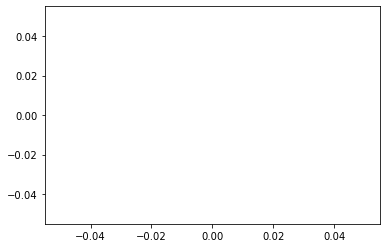

In [17]:
# Number of males finished in top 20% of race
plt.plot()

**Comments**



------------------

## Gender

get info for simulating

Distribution type

Standard deviation

Percentage of each etc.

In [18]:
marathonData.gender.value_counts()

M                 14664
F                 11980
Fredericksburg        1
62                    1
Name: gender, dtype: int64

In [19]:
# count male and female values
marathonSample.gender.value_counts()

M    552
F    448
Name: gender, dtype: int64

(array([552.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 448.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

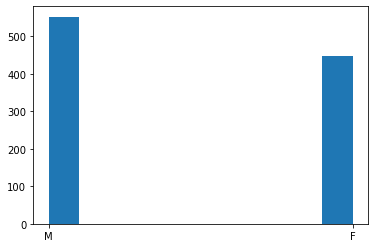

In [20]:
plt.hist(marathonSample["gender"])

**Comments**

54.5% Male

45.5% Female

------------------

## Time

get info for simulating

Distribution type

Standard deviation

Percentage of each etc.

 # Add labels to graph

(array([ 41., 188., 240., 189., 134.,  86.,  61.,  39.,  19.,   3.]),
 array([146.83333333, 171.73333333, 196.63333333, 221.53333333,
        246.43333333, 271.33333333, 296.23333333, 321.13333333,
        346.03333333, 370.93333333, 395.83333333]),
 <a list of 10 Patch objects>)

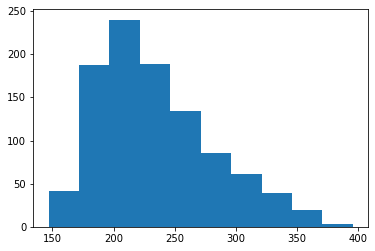

In [21]:
plt.hist(marathonSample["official_time"], bins=10)

In [22]:
# Calculate standard deviation
np.std(marathonSample["official_time"])

46.842444642486846

**Comments**



------------------

## Age

get info for simulating

Distribution type

Standard deviation

Percentage of each etc.

(array([ 48., 128., 142., 166., 170., 162., 112.,  55.,  14.,   3.]),
 array([19. , 24.8, 30.6, 36.4, 42.2, 48. , 53.8, 59.6, 65.4, 71.2, 77. ]),
 <a list of 10 Patch objects>)

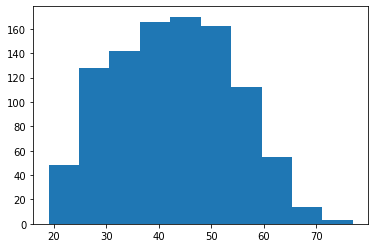

In [23]:
plt.hist(marathonSample["age"])

**Comments**



------------------

# 5. Simulate Data
------------------------


What kind of data set do I want to create


#### Galway Marathon 2020

Number of entrants = 1000


* ##  Time

Do time simulation here

------------------

### Investigation

--------------

References from data outside of Boston data set.... compare.... decision

### Type

Integer from datetime
In minutes for graph

### Distribution


Normal distribution


### Relationship

Directly influences position in race

----------------

In [24]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


Method found here https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy/44308018

In [25]:
# Set male times
maleMarathonTime = get_truncated_normal(mean=263, sd=45, low=122, upp=400)
maleTimes = maleMarathonTime.rvs(600)

# Set female times.
femaleMarathonTime = get_truncated_normal(mean=300, sd=60, low=134, upp=400)
femaleTimes = femaleMarathonTime.rvs(400)

##  Gender

 All gender simulation here
 
 
-------------


### Investigation




# average finishing times + world records

Male = 4:23:27 = 263mins
Female =  The average marathon female finish time in the UK is 5:00:39. = 300mins [[average]](https://www.runnersworld.com/uk/training/marathon/a27787958/average-marathon-finish-time/)

#### World records

Male - Eliud Kipchoge (Kenya) 2:01:39Time  - 4:38.4 Pace per mile -   Berlin, 2018 - 121.39mins
https://www.runnersworld.com/races-places/a20823734/these-are-the-worlds-fastest-marathoners-and-marathon-courses/

Female - Brigid Kosgei (Kenya) - 2:14:04 Time - 5:06.8 Pace - Chicago, 2019 = 134.04 mis


### Type





### Distribution






### Relationship





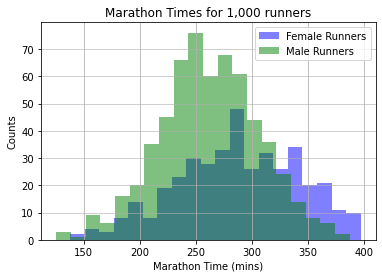

In [26]:
import pandas as pd


femaleMarathon = pd.Series(femaleTimes) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
maleMarathon = pd.Series(maleTimes)


femaleMarathon.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleMarathon.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Times for 1,000 runners')
plt.ylabel('Counts')
plt.xlabel('Marathon Time (mins)')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

In [27]:
250/60

4.166666666666667

standard deviation
https://runrepeat.com/women-are-better-runners-than-men-2020

Graph here [[]](https://realpython.com/python-histograms/)

##   Age

All age here

_______________

### Investigation 

Find average ages info

take info from boston

take info from Galway previously (sources)

### Type

Integer


### Distribution

Normal - 



### Relationship




#### Set ages for each gender

In [28]:
# Set male ages
maleMarathonAges = get_truncated_normal(mean=35, sd=10, low=18, upp=75)
maleAges = maleMarathonAges.rvs(600)

# Set female ages
femaleMarathonAges = get_truncated_normal(mean=35, sd=10, low=17, upp=75)
femaleAges = femaleMarathonAges.rvs(400)

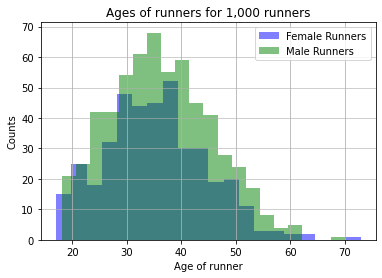

In [29]:
femaleAgesMar = pd.Series(femaleAges) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
maleAgesMar = pd.Series(maleAges)

femaleAgesMar.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleAgesMar.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Ages of runners for 1,000 runners')
plt.ylabel('Counts')
plt.xlabel('Age of runner')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

# 6. Create Dataframe - combine data

### Add gender column

In [30]:
FGender = np.full(shape=400, fill_value="F", dtype=np.dtype(object))

FGender
#femaleMarathon

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F

### Combine all gendered data

In [31]:
# Set as data frame and Add gender to df (https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)
dfFemale = pd.DataFrame(femaleMarathon) 
dfFemale['Gender'] = FGender
dfFemale['Age'] = femaleAges.round(0) #(https://stackoverflow.com/questions/61230535/how-to-round-the-column-mean-to-integer-in-a-dataframe-in-python)
dfFemale = dfFemale.rename(columns={0: "Time"}) 

dfFemale

,Time,Gender,Age
0,247.545622,F,38.0
1,358.126162,F,31.0
2,356.538116,F,30.0
3,343.764781,F,28.0
4,396.876452,F,25.0
...,...,...,...
395,320.455147,F,59.0
396,314.075851,F,29.0
397,244.091309,F,23.0
398,202.489610,F,50.0


In [32]:
dfMale = pd.DataFrame(maleMarathon)

Mgender = np.full(shape=600, fill_value="M", dtype=np.dtype(object))
dfMale['Gender'] = Mgender
dfMale['Age'] = maleAges.round(0)
dfMale = dfMale.rename(columns={0: "Time"}) 

frames = [df1, df2, df3]

In [5]: result = pd.concat(frames)dfMale

SyntaxError: invalid syntax (<ipython-input-32-fcc315d67320>, line 10)

# Combine two data frames

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
# Concationate data sets
frames = [dfMale, dfFemale]
df = pd.concat(frames)

df

https://towardsdatascience.com/half-marathon-finish-time-prediction-part-1-5807760033eb

# Sort values
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [ ]:
df = df.sort_values(by=['Time'])
df


### Investigation of Variables -  Place

--------------


### Type



### Distribution

Linear?

### Relationship




# Add new finish order

In [ ]:
df

https://stackoverflow.com/questions/42382263/valueerror-length-of-values-does-not-match-length-of-index-pandas-dataframe-u

In [ ]:
df = df.apply(lambda col: col.reset_index(drop=True))

In [ ]:
df.rename_axis("Place", axis='index', inplace=True)

# 7. Results: Simulated data set
-----------------

## Data Frame

In [ ]:
df

## Some graphs here

In [ ]:
sns.pairplot(df)

# 8. Conclusions

-------------------



## Discussion on data




## Alternate Methods




## Possible uses for data




## Sources of error

Male female stats
distribution errors

## Reccommended further study

more time splitting up data - Gender/ age.... more people running


# 9. References
___________________________